<a href="https://colab.research.google.com/github/pinkittys/assignment/blob/main/BIZ581_midterm_20249379_%EC%A0%95%EC%84%A0%EC%95%84_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 필수 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Part 1. Descriptive analysis (Q1–Q6)

Download and import the dataset “ecommerce.csv” from KLMS.

In [3]:
#Import the dataset "ecommerce.csv"
df = pd.read_csv('/content/ecommerce.csv')

In [4]:
# 데이터 dimension 알아보기
df.shape

(1593, 45)

In [5]:
# 데이터 구조 확인 - 상위 5행 출력
df.head()

,dateTime,country,city,region,screenRed,surveyType,purposeProductInfo,purposeBuyFromSite,purposeComparePricing,purposeInfoAndResources,...,behavReferral,behavPageviews,behavHomePage,behavDetailProdA,behavDetailProdB,behavDetailProdC,behavAnySolution,behavAnySale,behavCart,behavConversion
0,7/25/2014 14:10,United States,Monroe,LA,1280x1024,At Exit,Products,NaN,NaN,Resources,...,Direct,4,1,1,0,0,0,0,0,0
1,7/25/2014 15:01,United States,Ambler,PA,1280x800,At Exit,NaN,Buy from this site,Compare pricing,NaN,...,Unbranded Search,0,0,0,0,0,0,0,0,0
2,7/25/2014 15:15,United States,Beaumont,TX,768x1024,At Exit,NaN,NaN,Compare pricing,NaN,...,Unbranded Search,10,0,0,0,0,1,1,0,0
3,7/25/2014 17:05,United States,Cedar City,UT,1280x960,At Exit,Products,NaN,NaN,NaN,...,Unbranded Search,10,0,1,1,0,1,0,0,0
4,7/26/2014 0:27,United States,Bullhead City,AZ,1138x640,At Exit,NaN,NaN,NaN,Resources,...,Referred,0,0,0,0,0,0,0,0,0


In [6]:
# 결측치 및 데이터 확인
print(df.isna().sum())

dateTime                          0
country                           0
city                             36
region                           24
screenRed                         0
surveyType                        0
purposeProductInfo              500
purposeBuyFromSite             1094
purposeComparePricing          1210
purposeInfoAndResources        1072
purposeInfoOnOrder             1580
purposeOther                   1526
taskFindWhatLookingFor          682
concernShippingCost            1521
concernDeliverySpeed           1568
concernWarranties              1561
concernEaseToReturnProduct     1532
concernProductSafety           1579
concernRightForMyChild         1494
concernProductQuality          1538
concernProductEffectiveness    1508
concernOther                   1583
concernNone                    1484
intentWasPlanningToBuy         1095
profile                           0
whenSiteUsed                     53
purchasedBefore                 976
purchasedWhen               

일부 변수들에 많은 결측치가 관찰되어 결측치 삭제 시 데이터 손실에 큰 문제가 생긴다.\
따라서, 이후 결측치가 있는 변수 관련 문제는 문제마다 결측 데이터 포함 여부를 결정하여 분석 예정이다.

### Q1.

Produce a table that shows the number of site visitors by their country of origin. Which country has the most visitors?

In [7]:
# 방문자의 출신 국가별 방문자 수 계산
country_visitor = df.groupby('country').size().reset_index(name='Number of Visitors')

# 국가별 방문자 수 출력
print(country_visitor)

# 방문자가 가장 많은 국가 출력
most_visitors_country = country_visitor.loc[country_visitor['Number of Visitors'].idxmax()]
print(f"가장 많은 사이트 방문자 출신국가는 {most_visitors_country['Number of Visitors']} 방문자를 기록한 {most_visitors_country['country']}이다. ")


                 country  Number of Visitors
0              Australia                  50
1               Barbados                   1
2               Botswana                   1
3                 Brazil                   3
4                 Canada                  62
5               Colombia                   1
6             Costa Rica                   3
7                Denmark                   3
8                 France                   1
9                Germany                   2
10                 Haiti                   1
11                 India                  13
12               Ireland                   3
13                Israel                   4
14                 Italy                   1
15                 Japan                   1
16                Kuwait                   1
17              Malaysia                   3
18                 Malta                   2
19                Mexico                   3
20               Namibia                   1
21        

### Answer1:

가장 많은 사이트 방문자 출신국가는 1,361 방문자를 기록한 United States이다.

### Q2.

Produce a crosstabulation table for the intent to purchase (“intentWasPlanningToBuy” variable), broken out by user profile (“profile” variable). (Note. Don’t worry about value 0 in the profile variable.)

In [8]:
# intentWasPlanningToBuy와 profile 변수를 기준으로 교차표 생성
crosstab = pd.crosstab(df['intentWasPlanningToBuy'], df['profile'], dropna=False)
print(crosstab)

profile                           0  Friend/family friend  \
intentWasPlanningToBuy                                      
No                                0                     0   
Partially (I was considering it)  0                     1   
Yes                               0                     0   
NaN                               1                    22   

profile                           Health Professional  Other  Parent  \
intentWasPlanningToBuy                                                 
No                                                 12      5      16   
Partially (I was considering it)                   38     19     174   
Yes                                                24     14      96   
NaN                                               203     96     490   

profile                           Person with [condition A]  Relative  Teacher  
intentWasPlanningToBuy                                                          
No                                    

- 코멘트 : intentWasPlanningToBuy 변수는 결측치가 상당히 많기 때문에 결측치도 포함한 교차표를 생성하였다.(dropna=False)\
결측치가 얼마나 많은지 시각적으로 확인함으로써 전체적인 응답 분포를 이해하고자 하였다.

### Q3.

What are the proportions of parents who intended to purchase? (Hint: report the proportion of users who replied “Yes” among parents.)

In [9]:
# intentWasPlanningToBuy 변수의 고유 값 및 빈도 확인 시, NaN 결측치 비율이 매우 높은 것으로 확인
value_counts = df['intentWasPlanningToBuy'].value_counts(dropna=False)
print(value_counts)
print(f"'intentWasPlanningToBuy' 변수의 NaN 비율 높기 때문에 이 결측치를 제외하지 않으면 데이터 왜곡이 생길 수 있다.")

intentWasPlanningToBuy
NaN                                 1095
Partially (I was considering it)     289
Yes                                  163
No                                    46
Name: count, dtype: int64
'intentWasPlanningToBuy' 변수의 NaN 비율 높기 때문에 이 결측치를 제외하지 않으면 데이터 왜곡이 생길 수 있다.


In [ ]:
# 'profile'이 'Parent'인 행에서 결측치 제외 후 'Yes' 비율 계산
parents_df = df[(df['profile'] == 'Parent') & (df['intentWasPlanningToBuy'].notna())]
yes_proportion = (parents_df['intentWasPlanningToBuy'] == 'Yes').mean()
print(f"실제 응답한 부모 중(결측치 제외) 구매의도를 'Yes'라고 응답한 사람들의 비율: {yes_proportion:.2%}")


실제 응답한 부모 중(결측치 제외) 구매의도를 'Yes'라고 응답한 사람들의 비율: 33.57%


### Answer3 :
결측치를 포함하면 실제 응답이 없는 항목까지 전체 응답 수에 포함되어,\
"Yes" 응답 비율이 실제보다 **과소평가(왜곡)**될 수 있다. (결측 데이터 포함 시, 비율은 12.37%)\
이렇게 되면 실제 구매 의도가 있는 부모의 비율이 낮게 나타나, 분석의 신뢰성을 떨어뜨린다.\
따라서, 결측치를 제외한 실제 응답자 중 "Yes" 응답의 비율로 계산하여야 한다.\
결론적으로, 부모 중 구매 의사가 'Yes'인 사람들의 비율은 최종 33.57% 이다.

### Q4.

Produce a histogram for the number of visits to the site (“behavNumVisits” variable) with fifty bins. Explain what you observe from the histogram about the distribution of the variable.

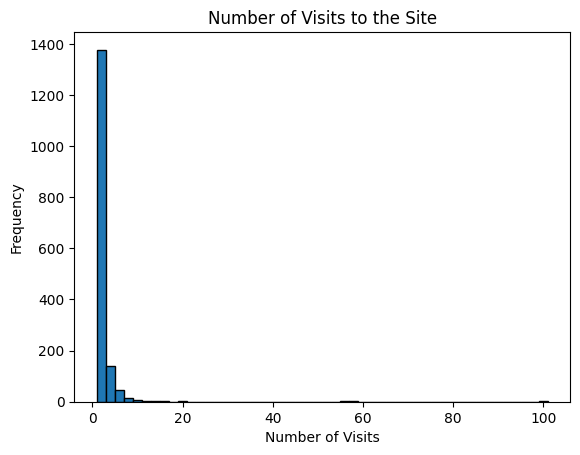

In [10]:
# behavNumVisits 히스토그램 생성 (빈 개수: 50)
plt.hist(df['behavNumVisits'], bins=50, edgecolor='black')
plt.title('Number of Visits to the Site')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.show()

### Answer4 :

대부분의 사용자들은 0-10 사이의 적은 방문 횟수를 기록, 낮은 방문 빈도의 방문자가 많다.\
그러나, 소수의 사용자들이 자주 사이트를 방문하고 있어, 히스토그램에서 오른쪽 꼬리가 긴 분포로 나타났다.

### Q5.

We want to understand whether more frequent visitors are likely to view more pages on the site. Compute the correlation between the two variables “behavNumVisits” and “behavPageviews”.

In [11]:
# 두 변수("behavNumVisits","behavPageviews") 간의 상관관계 계산
correlation = df['behavNumVisits'].corr(df['behavPageviews'])
print(f"방문 횟수와 페이지뷰 간의 상관관계: {correlation:.2f}")

방문 횟수와 페이지뷰 간의 상관관계: 0.01


### Answer5 :

상관계수가 0.01으로 두 변수 간의 상관관계가 거의 없다.\
즉, 사용자가 사이트를 더 자주 방문한다고 해서 그들이 반드시 더 많은 페이지를 본다는 의미는 아니다.

### Q6.

Show a table showing the average page views by user profile using groupby function.

In [12]:
# profile(사용자 프로필)별로 페이지뷰(behavPageviews)의 평균을 계산
avg_pv_profile = df.groupby('profile')['behavPageviews'].mean().reset_index()
print(avg_pv_profile)

                     profile  behavPageviews
0                          0        2.000000
1       Friend/family friend        5.521739
2        Health Professional        5.007220
3                      Other        4.149254
4                     Parent        6.161082
5  Person with [condition A]        5.557692
6                   Relative        5.579439
7                    Teacher        5.291480


Parent (6.16): 부모 그룹이 다른 그룹에 비해 가장 높은 평균 페이지뷰를 기록했다.



---



## Part 2. Linear regression analysis (Q7–Q12)

Download and import the dataset “BostonHousing.csv” from KLMS.


In [13]:
#Import the dataset "BostonHousing.csv"
df = pd.read_csv('/content/BostonHousing.csv')

In [14]:
# 데이터 dimension 알아보기
df.shape

(506, 14)

In [15]:
# 데이터 구조 확인 - 상위 5행 출력
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [16]:
# 데이터셋에서 결측치 확인
missing_data = df.isna().sum()

# 결측치가 있는 변수 출력
print(missing_data[missing_data > 0])


Series([], dtype: int64)


### Q7.

Run a linear regression model to predict the median house price (MEDV) as a function of CRIM, CHAS, and RM. Print the result using stargazer function.


In [17]:
!pip install stargazer

In [18]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML  # Colab에서 HTML 렌더링

In [19]:
# 선형 회귀 모델1 생성 - 종속변수(MEDV), 독립변수(CRIM, CHAS, RM)
model1 = sm.OLS.from_formula('MEDV ~ CRIM + CHAS + RM', data=df).fit()

# stargazer를 사용한 결과 출력
stargazer = Stargazer([model1])
stargazer.title("Linear Regression Results")
stargazer.significant_digits(3)  # 소수점 3자리로 결과 표시

# HTML 출력
html_output = stargazer.render_html()
display(HTML(html_output))

### Q8.

Interpret all the coefficients. Pay attention to the units of variables.

 MEDV가 $1,000 단위로 측정된다는 점을 고려하여, 다음과 같이 해석 할 수 있다.

- CHAS: 찰스강 근처에 있는 주택은 평균적으로 \$3,763 더 비싸다.  
- CRIM: 범죄율이 1 단위 증가할 때마다 주택 가격은 평균적으로 \$261 하락한다.  
- RM: 방의 개수가 1개 증가할 때마다 주택 가격은 평균적으로 \$8,278 상승한다.  
- Intercept: 모델의 상수항으로, 모든 독립 변수가 0일 때의 주택 가격을 의미하며, 해석상 크게 유의미하지 않을 수 있다.
- CHAS, CRIM, RM 각 변수 모두 (p < 0.01)로 모두 주택가격에 유의미한 영향을 미치는 변수로 해석된다.
- R² = 0.553으로, 이 모델은 주택 가격 변동의 약 55.3%를 설명한다.

### Q9.

Run a linear regression model whose dependent variable is MEDV and independent variable is NOX. Interpret the coefficients.


Q7-Q8에서는 Stargazer function을 사용해 깔끔하게 요약한 결과를 전달했지만, Q9 이후 질문들은 독립변수에 따라 좀 더 세밀한 해석과 p-value를 확인하는데 초점을 맞추고 있으므로 stargazer가 아닌 summary()가 더 적합하다고 판단하였다.

In [20]:
# 회귀 모델2 생성 - 종속변수(MEDV), 독립변수(NOX)
model2 = sm.OLS.from_formula('MEDV ~ NOX', data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           7.07e-24
Time:                        16:42:58   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3459      1.811     22.828      0.0

**계수(Coefficient) 해석:**

1. NOX (질소 산화물 농도, parts per 10 million 단위) = -33.916
- NOX 농도가 1단위 증가할 때마다, 즉 질소 산화물 농도가 0.1ppm 증가할 때마다, 주택의 중위 가격(MEDV)이 평균적으로 $33,916 감소한다.\
p-value가 0.000으로 매우 낮기 때문에, 이 변수는 주택 가격에 통계적으로 유의미한 영향을 미친다.


2. 절편 (Intercept) = 41.3459
- NOX 값이 0일 때 주택 중위 가격을 의미한다.\
즉, 공기 오염이 전혀 없는 가상의 상태에서 주택 가격이 어떻게 형성될지에 대한 예측값이다.\
하지만 실제로 NOX가 0인 경우는 거의 없으므로 절편의 실질적인 해석은 중요하지 않다.



**모델 성능:**
- R-squared = 0.183\
이 모델은 **주택 가격의 약 18.3%**를 설명한다.\
즉, NOX (질소산화물농도) 변수만으로는 주택 가격의 변동성을 충분히 설명하지 못한다.\
다른 요인들이 주택 가격에 더 큰 영향을 미칠 가능성이 크다.

- F-statistic = 112.6\
F-통계량은 모델이 유의미함을 나타낸다.\
p-value가 매우 낮아(0.000) 모델 전체가 통계적으로 유의미하다.



### Q10.

Add the following variables to the previous regression model: INDUS and TAX. Interpret the coefficients.

In [21]:
# 회귀 모델3 생성 - 종속변수(MEDV), 독립변수(NOX, + INDUS, TAX 변수 추가)
model3 = sm.OLS.from_formula('MEDV ~ NOX + INDUS + TAX', data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     60.64
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.81e-33
Time:                        16:43:09   Log-Likelihood:                -1762.0
No. Observations:                 506   AIC:                             3532.
Df Residuals:                     502   BIC:                             3549.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8234      2.049     16.992      0.0

**계수(Coefficient) 해석**:

1. NOX (질소 산화물 농도, parts per 10 million) = -5.845
- NOX가 1단위 증가할 때마다, 즉 질소 산화물 농도가 0.1ppm 증가할 때마다, **주택 중위 가격(MEDV)**이 평균 \$5,845 감소한다.\
다만, p-value가 0.231로 높아 통계적으로 유의미하지 않다.


2. INDUS (비소매 상업 지역 비율, %) = -0.349
- 비소매 상업 지역 비율이 1% 증가할 때 주택 가격이 평균적으로 \$349 감소한다.\
p < 0.01 수준에서 유의미한다.


3. TAX (재산세율 per \$10,000) = -0.0126
- 재산세율이 \$10,000 당 1 단위 증가할 때, 주택 가격이 평균 \$12.6 감소한다.\
p < 0.01 수준에서 유의미하다.


4. Intercept (절편) = 34.823
- NOX, INDUS, TAX가 모두 0일 때 예상되는 주택 가격은 $34,823원으로\
이 값은 이론적인 기준점으로, 독립 변수가 0일 때의 주택 가격이다.


**모델 성능 :**
- R-squared = 0.266\
이 모델은 주택 가격(MEDV)의 **26.6%**를 설명한다.\
이전 모델에서 R-squared 값이 0.183이었으므로, INDUS와 TAX 변수를 추가하여 모델의 설명력이 향상되었다.

- F-statistic = 60.64, p-value < 0.001\
모델 전체가 통계적으로 유의미하다. 즉, NOX, INDUS, TAX은 주택 가격에 영향을 미치는 중요한 변수다.

### Q11.

Notice that coefficient of NOX was significant in Q9, but it is no longer significant in Q10 Why do you think this happened? Name the problem that describes this phenomenon.

NOX 계수가 Q9에서는 유의미했지만, Q10에서는 유의미하지 않은 이유는 **다중공선성(multicollinearity)** 때문이다.\
다중공선성은 회귀 분석에서 독립 변수들 간에 높은 상관관계가 존재하는 경우를 말한다.

Q9에서는 NOX가 유의미한 변수였지만, Q10에서 INDUS와 TAX 변수를 추가하자\
NOX의 p-value가 증가하여 더 이상 유의미하지 않게 되었다.\
이는 NOX가 INDUS 및 TAX와 상관관계가 높아,\
NOX가 설명하는 정보가 INDUS와 TAX에 의해 대체되었기 때문에\
NOX가 더 이상 독립적으로 주택 가격에 대한 영향을 설명할 수 없게 되어 통계적으로 유의미하지 않게 되었다.

이미 Q10의 회귀 분석 결과에서 Condition Number = 6.56e+03로,\
다중공선성(multicollinearity) 이 존재할 가능성이 크다고 경고하고 있다.


## Q12. (Optional, extra credit: 3 points)

 Run analysis that you believe is appropriate to support your answer in Q11.

In [ ]:
# NOX, INDUS, TAX 변수들의 상관행렬 계산
correlation_matrix = df[['NOX', 'INDUS', 'TAX']].corr()
print(correlation_matrix)


            NOX     INDUS       TAX
NOX    1.000000  0.763651  0.668023
INDUS  0.763651  1.000000  0.720760
TAX    0.668023  0.720760  1.000000


### 상관행렬 해석:
- NOX와 INDUS의 상관계수 = 0.763\
NOX와 INDUS 사이에는 높은 상관관계가 있다.\
이는 이 두 변수가 비슷한 정보를 제공하고 있다는 것을 의미한다.\
Q10에서 NOX가 유의미하지 않게 된 이유는, INDUS 변수가 추가되면서 NOX의 영향이 중복될 수 있었기 때문이다.

- NOX와 TAX의 상관계수 = 0.668\
NOX와 TAX 역시 상당한 상관관계를 가지고 있다.\
이는 NOX와 TAX가 주택 가격에 비슷한 영향을 미칠 수 있다는 것을 나타낸다.


- INDUS와 TAX의 상관계수 = 0.721\
INDUS와 TAX 역시 높은 상관관계를 보인다.


### 결론:
NOX, INDUS, TAX 변수들 간에 높은 상관관계가 존재하며, 이는 다중공선성 문제를 일으키고 있다.\
NOX가 Q9에서는 유의미했지만, Q10에서는 유의미하지 않은 이유는\
INDUS와 TAX 변수가 추가되면서 NOX의 설명력이 약해졌기 때문이다.
이 결과는 다중공선성으로 인해 NOX의 독립적인 영향이 약해졌음을 보여준다.

=== END OF THE TEST ===